<a href="https://colab.research.google.com/github/IlyaGolovin/KNN_school_project/blob/master/KNN_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/KNN_project_part2/DATA/KNN_Project_Data", index_col = 0)

In [3]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


EDA : Exploratory Data Analysis, or EDA, is essentially a type of storytelling for statisticians. It allows us to uncover patterns and insights, often with visual methods, within data. EDA is often the first step of the data modelling process.


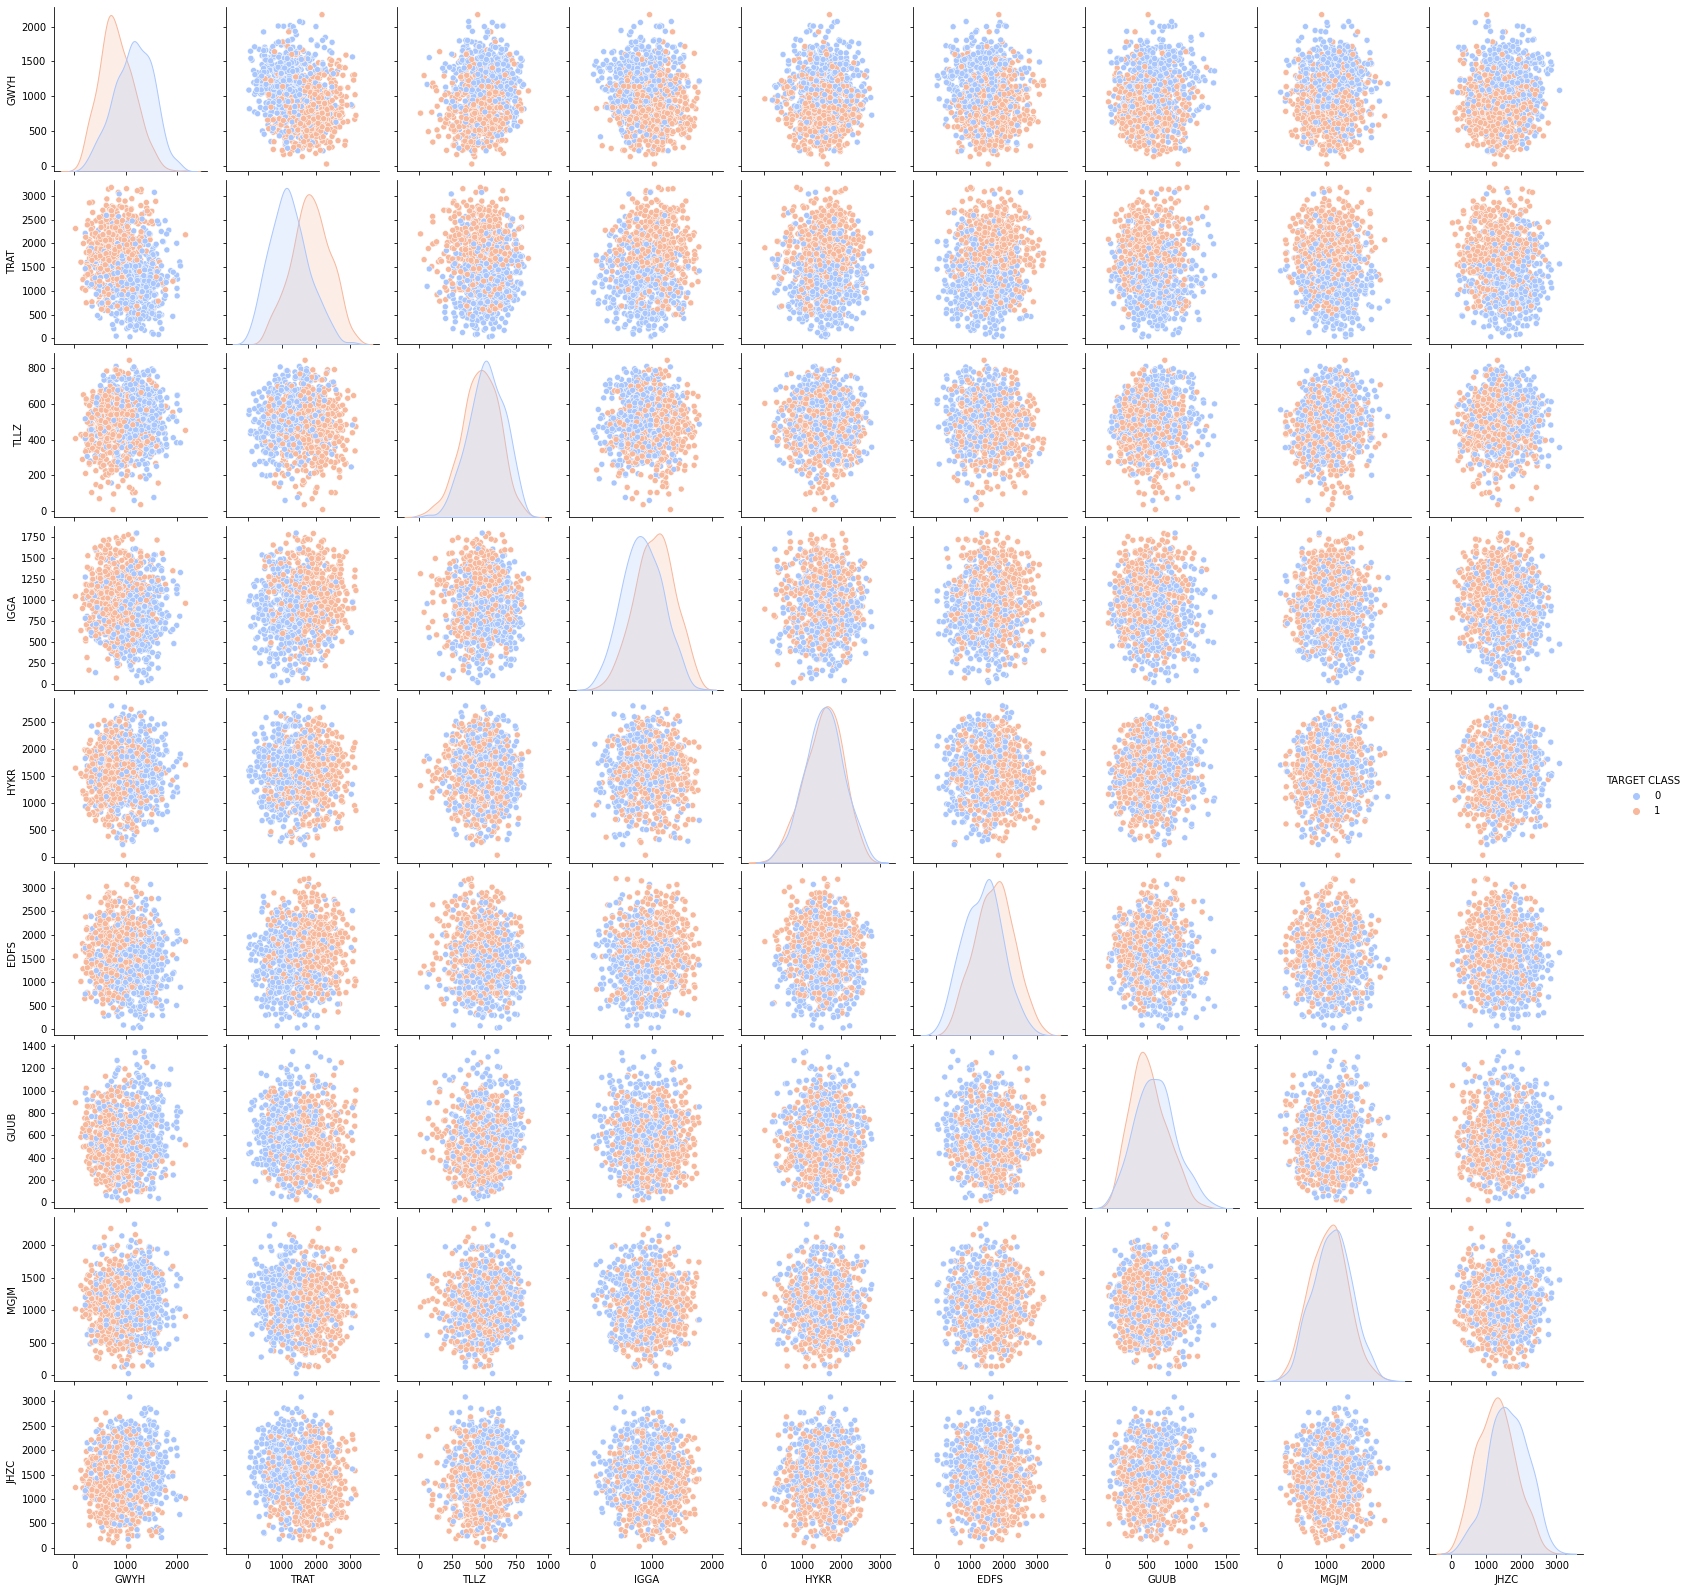

In [4]:
sns.pairplot(df,hue="TARGET CLASS",palette='coolwarm')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

Using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predictions and Evaluations

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[107  43]
 [ 31 119]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       150
           1       0.73      0.79      0.76       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



Choosing a K value 
I am going to create a loop so that *The algoritmh* trains various KNN models with different k values. then I'd like to keep track of the error_rate for each of the models with a list

Text(0, 0.5, 'Error Rate')

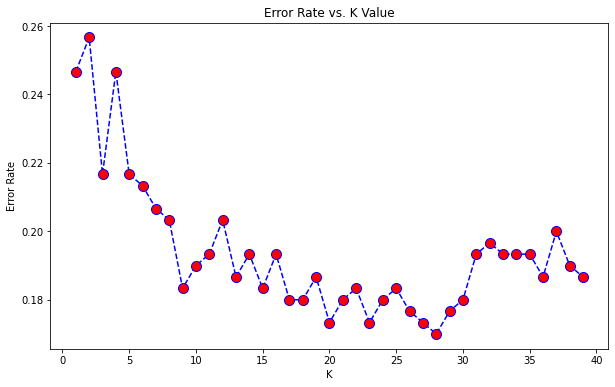

In [19]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') 

Retrain with K Value

In [20]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print("WITH K=30")
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[122  28]
 [ 26 124]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       150
           1       0.82      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

